<a href="https://colab.research.google.com/github/saitejakomaragiri/saitejakomaragiri/blob/main/project2_digital_marketing_reviews_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import string
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Indeed_projectmanagementrevs.csv to Indeed_projectmanagementrevs.csv


In [ ]:
data = pd.read_csv('Indeed_projectmanagementrevs.csv')
data.head()

,Comments
0,The PMP course was online through Simplilearn....
1,"Great instructor, great materials, led to othe..."
2,"Good materials for the price, well structured ..."
3,"Good classroom learning, the tutor was very go..."
4,The classes themselves are good but there coul...


In [ ]:
data.shape

(26, 1)

In [ ]:
data.isnull().sum()

# no missing values in the data 

Comments    0
dtype: int64

In [ ]:
#we were only interested in the comments and rating hence we only consider comments.

# collecting only tweets from the given dataset

new_data = pd.DataFrame()
new_data['comment'] = data['Comments'].copy()

new_data.head()

,comment
0,The PMP course was online through Simplilearn....
1,"Great instructor, great materials, led to othe..."
2,"Good materials for the price, well structured ..."
3,"Good classroom learning, the tutor was very go..."
4,The classes themselves are good but there coul...


In [ ]:
# function for cleaning the data
import string

def cleantext(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\W*\d\w*', '', text)
  text = re.sub('[''""...]', '', text)
  text = re.sub('\n', '', text)

  return text

new_data['comment'] = new_data['comment'].apply(cleantext)

#show cleaned data 
new_data.head() 



,comment
0,the pmp course was online through simplilearn ...
1,great instructor great materials led to other ...
2,good materials for the price well structured l...
3,good classroom learning the tutor was very goo...
4,the classes themselves are good but there coul...


In [ ]:
# creating  a function for subjectivity
def createsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# creating a function for polarity
def createpolarity(text):
  return TextBlob(text).sentiment.polarity

# creating subjectivity and polarity columns

new_data['subjectivity'] = new_data['comment'].apply(createsubjectivity)   
new_data['polarity'] = new_data['comment'].apply(createpolarity) 

new_data.head(10)

,comment,subjectivity,polarity
0,the pmp course was online through simplilearn ...,0.450000,0.175000
1,great instructor great materials led to other ...,0.595000,0.295000
2,good materials for the price well structured l...,0.572222,0.475000
3,good classroom learning the tutor was very goo...,0.706000,0.642000
4,the classes themselves are good but there coul...,0.550000,0.425000
5,a great option for ondemand learning that was ...,0.780833,0.573333
6,if you are looking to safe costs and selflearn...,0.225000,0.450000
7,the instructor was very knowledgeable and had ...,0.375000,0.400000
8,it explained how the test works essential to p...,0.594444,0.250000
9,the live courses for the pmp exam were well or...,0.706667,0.363939


In [ ]:
# creating a function to check +ve , -ve & neutral comments

def createanalysis(score):
  if (score < 0):
    return 'Negative'
  elif (score == 0):
      return 'Neutral'
  else:
      return 'Positive'

new_data['analysis'] = new_data['polarity'].apply(createanalysis)

# showing the dataset
new_data.head(10)

,comment,subjectivity,polarity,analysis
0,the pmp course was online through simplilearn ...,0.450000,0.175000,Positive
1,great instructor great materials led to other ...,0.595000,0.295000,Positive
2,good materials for the price well structured l...,0.572222,0.475000,Positive
3,good classroom learning the tutor was very goo...,0.706000,0.642000,Positive
4,the classes themselves are good but there coul...,0.550000,0.425000,Positive
5,a great option for ondemand learning that was ...,0.780833,0.573333,Positive
6,if you are looking to safe costs and selflearn...,0.225000,0.450000,Positive
7,the instructor was very knowledgeable and had ...,0.375000,0.400000,Positive
8,it explained how the test works essential to p...,0.594444,0.250000,Positive
9,the live courses for the pmp exam were well or...,0.706667,0.363939,Positive


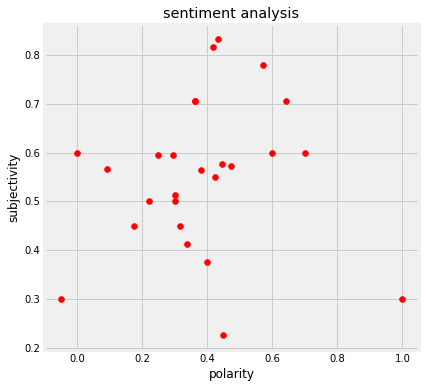

In [ ]:
# plotting a scatter plot 

plt.figure(figsize=(6,6))
for i in range(0, data.shape[0]):
  plt.scatter(new_data['polarity'][i], new_data['subjectivity'][i], color = 'Red')

plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.title('sentiment analysis')
plt.show()


In [ ]:
#number of positive , negative & neutral comments comments
poscomments = 0
neutralcomments = 0
negcomments = 0

for i in range (0, data.shape[0]):
  if (new_data['analysis'][i] == 'Positive'):
    poscomments = poscomments+1
  elif (new_data['analysis'][i] == 'Neutral'):
    neutralcomments = neutralcomments+1
  else :
      negcomments = negcomments+1

print('number of positive tweets :',poscomments)
print('number of neutral tweets :',neutralcomments)
print('number of negative tweets :',negcomments)   

number of positive tweets : 24
number of neutral tweets : 1
number of negative tweets : 1


In [13]:
#number of positive , negative & neutral comments comments

print('percentage of positive comments :', round((poscomments/new_data.shape[0])*100, 1),'%')

print('percentage of neutral comments :', round((neutralcomments/new_data.shape[0])*100, 1),'%')

print('percentage of negative comments :', round((negcomments/new_data.shape[0])*100, 1),'%')

percentage of positive comments : 92.3 %
percentage of neutral comments : 3.8 %
percentage of negative comments : 3.8 %
